### Analyze list of compounds


In [32]:
import math
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

init_notebook_mode(connected=True)  # initiate notebook for offline plot

### Load data and create list of data columns
The data table is loaded from the results folder. _value_columns_ holds all numeric columns. _class_columns_ might be
 interesting to group data.

In [45]:
df = pd.read_csv("results/full_table.tsv", sep="\t")
df["md_by_mass"] = df.apply(lambda row: row["mass_defect"]/row["exact_mass"]*100, axis=1)

value_columns = ("exact_mass	mass_defect	md_by_mass	mol_log_p	valenz	hba	hbd	num_rot_bonds	hetero_atoms	c_atoms	o_atoms	heavy_atoms").split("\t")

class_columns = ("class_results_np_classifier	superclass_results_np_classifier	pathway_results_np_classifier	isglycoside_np_classifier	fp1_np_classifier	fp2_np_classifier	kingdom_classyfire	superclass_classyfire	class_classyfire	subclass_classyfire	intermediate_nodes_classyfire	alternative_parents_classyfire	direct_parent_classyfire	molecular_framework_classyfire	substituents_classyfire	description_classyfire	external_descriptors_classyfire	ancestors_classyfire	predicted_chebi_terms_classyfire	predicted_lipidmaps_terms_classyfire	classification_version_classyfire	therapeutic_flag_chembl	natural_product_chembl	indication_class_chembl	num_chembl_entries	chirality_chembl	max_phase_chembl").split("\t")

other_columns = ("molecule_chembl_id_chembl	pref_name_chembl	molecule_synonyms_chembl	wikipedia_id_chembl	pubchem_id_chembl").split("\t")

no_distribution_columns = ("aromatic_rings	n_atoms	p_atoms	s_atoms	halogen_atoms	alogp_chembl	cx_logd_chembl	cx_logp_chembl	cx_most_apka_chembl	cx_most_bpka_chembl").split("\t")

In [ ]:
field = "exact_mass"

# fig = go.Figure(data=go.Violin(y=df[field], box_visible=True, line_color='black',
#                                meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
#                                x0=field, y0=field))
#
# fig.update_layout(yaxis_zeroline=False)
# fig.show()

fig = px.violin(df, y=field, box=True, points="all", hover_data=df.columns)
fig.show()

In [ ]:
sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
sns.displot(
    df, x="flipper_length_mm", col="species", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

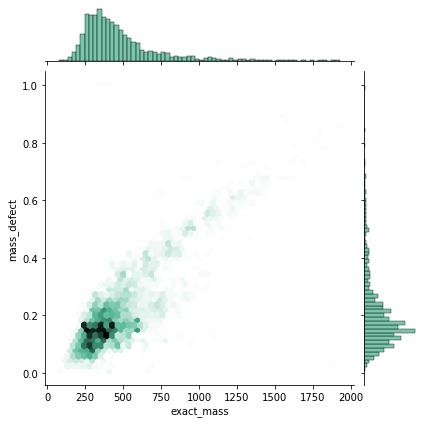

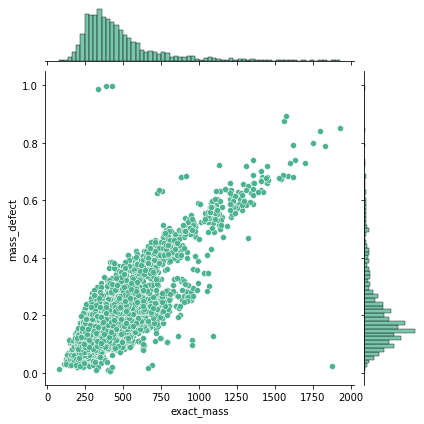

In [16]:

sns.jointplot(data=df, x="exact_mass", y="mass_defect", kind="hex", color="#4CB391")
sns.jointplot(data=df, x="exact_mass", y="mass_defect", color="#4CB391")

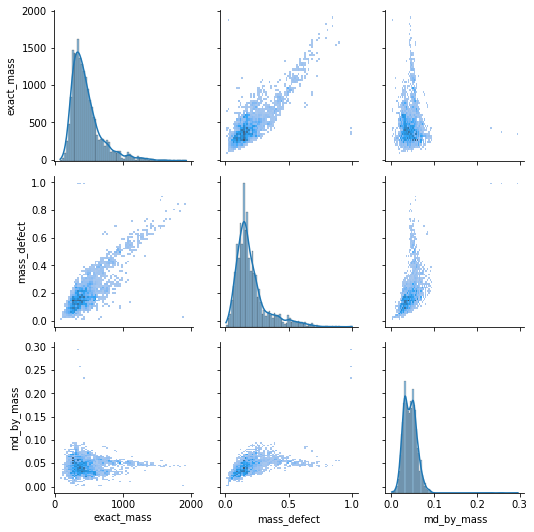

In [46]:

# num_rot_bonds, hetero_atoms
g = sns.PairGrid(df, vars=["exact_mass","mass_defect","md_by_mass"])
g.map_upper(sns.histplot)
g.map_lower(sns.histplot)
g.map_diag(sns.histplot, kde=True)

### Plot specific data as grid

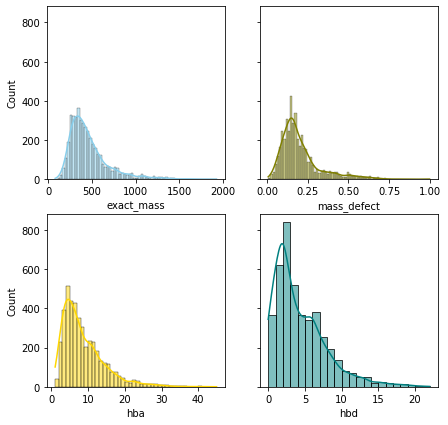

In [30]:
fig, axs = plt.subplots(2, 2, sharey=True, figsize=(7, 7))

sns.histplot(data=df, x="exact_mass", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="mass_defect", kde=True, color="olive", ax=axs[0, 1])
# hba and hbd are int values with discrete intevals - therefore set bins to avoid gaps
sns.histplot(data=df, x="hba", binwidth=1, kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="hbd", binwidth=1, kde=True, color="teal", ax=axs[1, 1])

plt.show()

### Histogram grid of all value columns

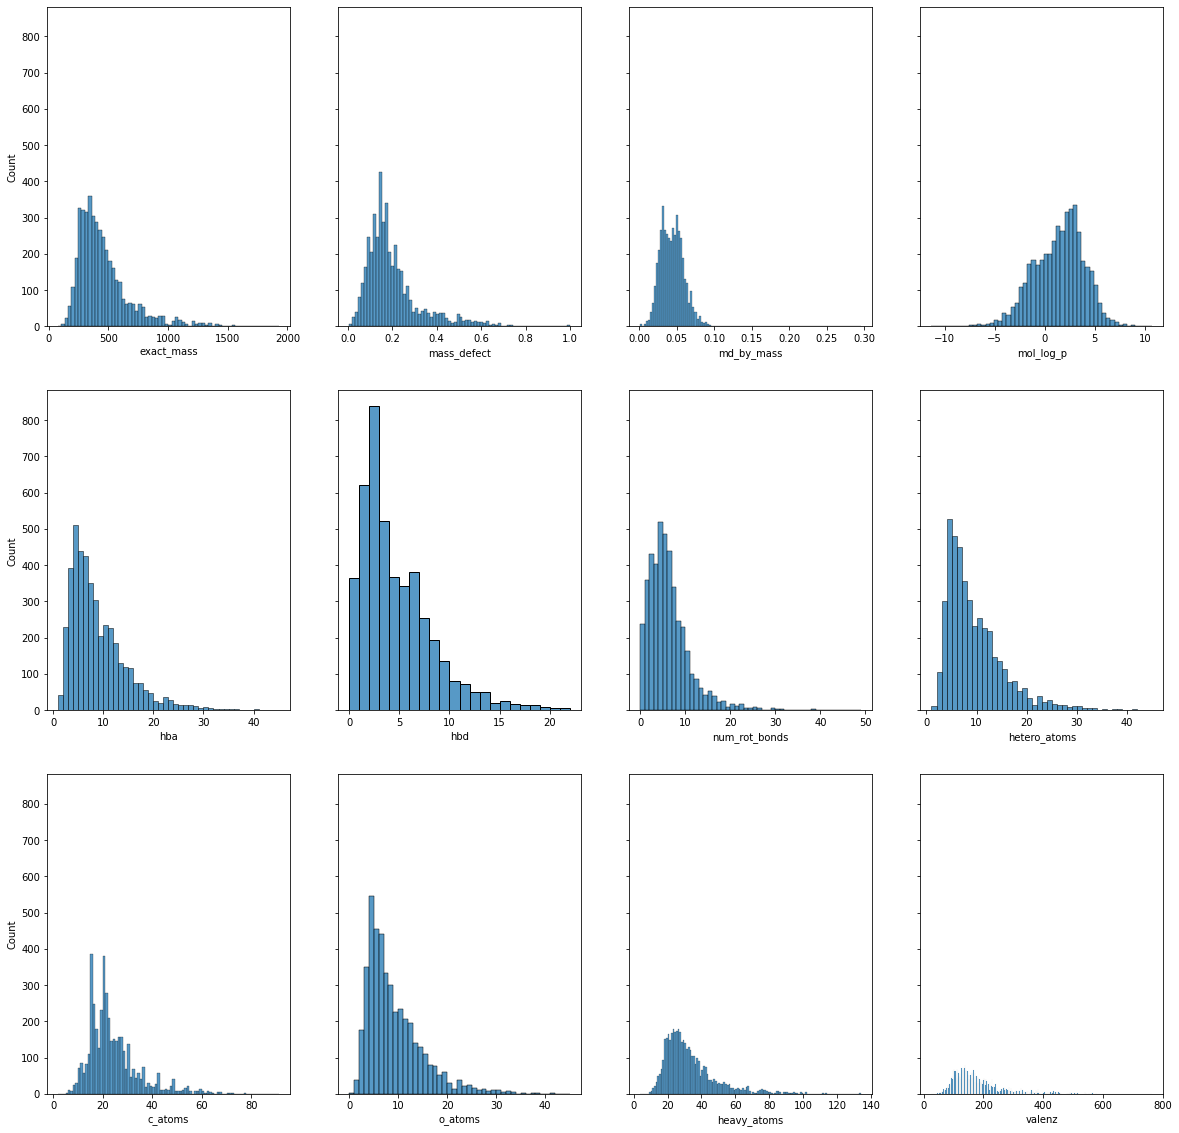

In [44]:
# create grid
cols = 4
rows = math.ceil(len(value_columns)/4)
fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(20, 20))

discrete_values_start_index = 5

for index, column in enumerate(value_columns):
    ci = index % cols
    ri = math.floor(index / cols)
    if index >= discrete_values_start_index:
        sns.histplot(data=df, binwidth=1, x=column, ax=axs[ri, ci])
    else:
        sns.histplot(data=df, x=column, ax=axs[ri, ci])

plt.show()